In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (10000, 2)
y shape: (10000,)


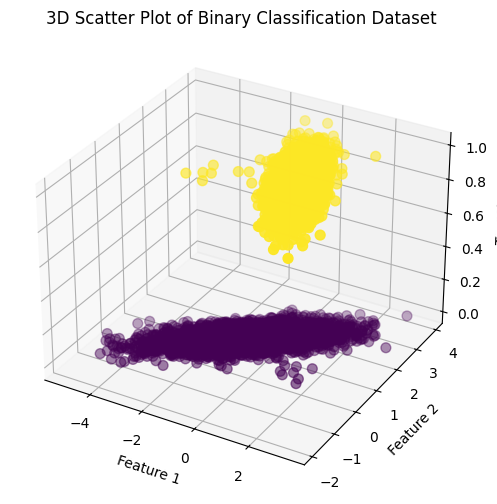

In [3]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

feature1 = X[:, 0]
feature2 = X[:, 1]
ax.scatter(feature1, feature2, y, c=y, cmap='viridis', s=50)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')

plt.title('3D Scatter Plot of Binary Classification Dataset')
plt.show()

In [158]:
class Perceptron:
    activations = {
        "sigmoid": lambda x: (1 / (1 + np.exp(-x)))
    }

    def __init__(self, input_shape, activation='sigmoid'):
        self.w = np.random.random((input_shape, 1))
        self.b = np.random.random((1,))
        self.activation = activation
        
    def output(self, input):
        return self.activations.get(self.activation)(input.dot(self.w) + self.b)

class Layer:
    activations = {
        "sigmoid": lambda x: (1 / (1 + np.exp(-x)))
    }

    def __init__(self, num_neuron, input, activation="sigmoid"):
        self.num_neuron = num_neuron
        self.input_shape = input if len(input) == 3 else (1, input[0], input[1])
        self.w = np.random.random((self.input_shape[1], self.num_neuron))
        #print("wieghts: ", self.w.shape)
        self.b = np.random.random(( self.num_neuron, 1)) * np.ones((1, self.input_shape[0]))
        self.b = self.b.reshape(self.b.shape[0], self.b.shape[1], 1)
        #print("bais: ", self.b.shape)
        self.activation = activation
        self.output_shape = (self.input_shape[0], self.num_neuron, 1)

    def output(self, input):
        input = input if len(input.shape) == 3 else input.reshape((1, input.shape[0], input.shape[1]))
        out = self.w.T.dot(input) + self.b
        out = out.reshape((out.shape[1], out.shape[0], out.shape[2]))
        return self.activations.get(self.activation)(out)

class Model:
    def __init__(self):
        self.layers = []
    
    def add_layer(self, num_neuron, input_shape=None, activation="sigmoid"):
        if input_shape == None: input_shape = self.layers[-1].output_shape
        self.layers.append(Layer(num_neuron, input_shape, activation))
        
    def forward(self, x):
        out = x
        for y, layer in enumerate(self.layers):
            out = layer.output(out)
            #print(f"the shape of the int layer {y}: ", layer.input_shape)
            #print(f"the shape of the out layer {y}: ", layer.output_shape)
        return out
        
    def loss(self, y_hot, y):
        return 1/y.shape[0]*np.sum((y_hot-y)**2)

    def gradian_w(self, y_hot, y, x):
        print(x.shape)
        return x/y.shape[0]*np.sum(y_hot-y)
        
    def gradian_b(self, y_hot, y):
        return 1/y.shape[0]*np.sum(y_hot-y)

In [159]:
X = X.reshape(X.shape[0], X.shape[1], 1)
X[:4].shape

(4, 2, 1)

In [160]:
model = Model()
model.add_layer(3, X[:4].shape)

In [161]:
y_hot = model.forward(X[:4])
y_hot

array([[[0.8779128 ],
        [0.60597976],
        [0.38599087]],

       [[0.90656281],
        [0.76633671],
        [0.62567017]],

       [[0.54660882],
        [0.76634714],
        [0.87475146]],

       [[0.60470872],
        [0.39107091],
        [0.90135456]]])

In [162]:
model.loss(y_hot, y[:4])

3.8165362055543284

In [163]:
model.gradian_w(y_hot, y[:4], X[:4])

(4, 2, 1)


array([[[ 1.46664395],
        [ 4.1299832 ]],

       [[-2.67034323],
        [ 2.29690195]],

       [[-5.53414982],
        [ 1.71017653]],

       [[ 3.21516575],
        [ 3.51578908]]])

In [164]:
model.gradian_b(y_hot, y[:4])

2.253294723076702

In [165]:
model.layers[0].w

array([[0.58681514, 0.16238944, 0.55890734],
       [0.5715849 , 0.46208551, 0.60524921]])

In [156]:
model.layers[0].w = model.layers[0].w - 0.01*model.gradian_w(y_hot, y[:4], X[:4])

In [157]:
model.layers[0].w

array([[[0.10820275, 0.83376979, 0.55254988],
        [0.11383203, 0.58825216, 0.60242741]],

       [[0.1471139 , 0.87268093, 0.59146102],
        [0.13107339, 0.60549352, 0.61966878]],

       [[0.17404993, 0.89961696, 0.61839705],
        [0.13659194, 0.61101207, 0.62518732]],

       [[0.09175673, 0.81732376, 0.53610385],
        [0.11960894, 0.59402907, 0.60820432]]])

In [130]:
model.loss(y_hot, y[:100])

93.02065996646081